In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

659

## Perform API Calls

In [3]:
import openweathermapy.core as owm
from pprint import pprint
from urllib.error import HTTPError

# OpenWeatherMap API Key
api_key = api_keys.api_key

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

weather_data = []
city_idx = []

total_cities = len(cities)
sets = int(total_cities / 50) + int((total_cities % 50) > 0)
#print("{} {} {}".format(total_cities, sets, ((total_cities % 50) > 0)))
curr_cnt = 0

# Get current weather
for i, city in enumerate(cities):
    #print(f'{city}')
    try:
        current_weather = owm.get_current(city, **settings)
#        current_weather = city
    except HTTPError:
        print(f"No weather found for city {i} {city}")
    else:
#        pprint(f"Current weather object for Paris: {current_weather}.")
        print(f"Processing Record {curr_cnt % 50} of Set {int(curr_cnt / 50)} | {city}")
        curr_cnt += 1
        weather_data.append(current_weather)
        #pprint(weather_data)
#     if (i >= 20):
#         break

# summary = ['coord']
# data = [response(*summary) for response in weather_data]
summary = ['id', 'name', "clouds.all", 'sys.country', 'dt', "main.humidity",
           'coord.lat', 'coord.lon', "main.temp_max", 'wind.speed']
data = [response(*summary) for response in weather_data]
#print(len(weather_data))
#print(weather_data)
# print(len(data))
# print(data)

weather_data_df = pd.DataFrame(data, columns=['City ID', 'City Name', 'Cloudiness(%)',
                                              'Country', 'Date', 'Humidity(%)', 'Lat', 'Long',
                                              'MaxTemp(in F)', 'Wind Speed(mph)'])
weather_data_df
#weather_data_df.count()

Processing Record 0 of Set 0 | tasiilaq
Processing Record 1 of Set 0 | kargil
No weather found for city 2 bengkulu
Processing Record 2 of Set 0 | moose factory
Processing Record 3 of Set 0 | waipawa
Processing Record 4 of Set 0 | cedar city
Processing Record 5 of Set 0 | flinders
Processing Record 6 of Set 0 | sakaiminato
Processing Record 7 of Set 0 | uthal
Processing Record 8 of Set 0 | ushuaia
Processing Record 9 of Set 0 | hermanus
Processing Record 10 of Set 0 | bluff
Processing Record 11 of Set 0 | kahului
Processing Record 12 of Set 0 | rikitea
No weather found for city 14 amderma
Processing Record 13 of Set 0 | kamina
Processing Record 14 of Set 0 | ilulissat
Processing Record 15 of Set 0 | kyabe
Processing Record 16 of Set 0 | ko samui
Processing Record 17 of Set 0 | punta arenas
Processing Record 18 of Set 0 | vaini
Processing Record 19 of Set 0 | mataura
Processing Record 20 of Set 0 | phek
Processing Record 21 of Set 0 | san antonio
Processing Record 22 of Set 0 | qandala
P

Processing Record 29 of Set 3 | new norfolk
Processing Record 30 of Set 3 | bidar
Processing Record 31 of Set 3 | high level
Processing Record 32 of Set 3 | ocampo
No weather found for city 206 sembe
Processing Record 33 of Set 3 | caluquembe
Processing Record 34 of Set 3 | kabanjahe
No weather found for city 209 barentsburg
Processing Record 35 of Set 3 | srednekolymsk
No weather found for city 211 guajara-mirim
Processing Record 36 of Set 3 | tobetsu
Processing Record 37 of Set 3 | itarema
Processing Record 38 of Set 3 | kodiak
Processing Record 39 of Set 3 | sneek
Processing Record 40 of Set 3 | vardo
Processing Record 41 of Set 3 | huilong
Processing Record 42 of Set 3 | lokosovo
Processing Record 43 of Set 3 | tabas
Processing Record 44 of Set 3 | ocean springs
Processing Record 45 of Set 3 | mulbagal
Processing Record 46 of Set 3 | macau
Processing Record 47 of Set 3 | harrison
Processing Record 48 of Set 3 | verkhoshizhemye
Processing Record 49 of Set 3 | paraiso
Processing Reco

Processing Record 15 of Set 7 | mpanda
Processing Record 16 of Set 7 | freeport
Processing Record 17 of Set 7 | buchanan
Processing Record 18 of Set 7 | luanda
Processing Record 19 of Set 7 | porto novo
Processing Record 20 of Set 7 | cayenne
Processing Record 21 of Set 7 | touros
Processing Record 22 of Set 7 | los alamos
Processing Record 23 of Set 7 | anadyr
Processing Record 24 of Set 7 | derby
Processing Record 25 of Set 7 | macklin
Processing Record 26 of Set 7 | vredendal
Processing Record 27 of Set 7 | sosnovo-ozerskoye
Processing Record 28 of Set 7 | noumea
Processing Record 29 of Set 7 | sawai madhopur
Processing Record 30 of Set 7 | port augusta
Processing Record 31 of Set 7 | barcelos
Processing Record 32 of Set 7 | serenje
Processing Record 33 of Set 7 | alekseyevsk
Processing Record 34 of Set 7 | yenagoa
Processing Record 35 of Set 7 | chapais
Processing Record 36 of Set 7 | muhos
Processing Record 37 of Set 7 | seydi
Processing Record 38 of Set 7 | hirakud
Processing Rec

Processing Record 48 of Set 10 | ust-nera
Processing Record 49 of Set 10 | pimenteiras
Processing Record 0 of Set 11 | jutai
Processing Record 1 of Set 11 | atar
Processing Record 2 of Set 11 | severobaykalsk
Processing Record 3 of Set 11 | adeje
Processing Record 4 of Set 11 | huntsville
Processing Record 5 of Set 11 | southport
Processing Record 6 of Set 11 | kankon
Processing Record 7 of Set 11 | sangar
Processing Record 8 of Set 11 | goroka
Processing Record 9 of Set 11 | popesti
Processing Record 10 of Set 11 | jilin
Processing Record 11 of Set 11 | lagos
No weather found for city 615 halalo
No weather found for city 616 jibuti
No weather found for city 617 utiroa
Processing Record 12 of Set 11 | itamarandiba
Processing Record 13 of Set 11 | dzhebariki-khaya
Processing Record 14 of Set 11 | fairlie
Processing Record 15 of Set 11 | suntar
Processing Record 16 of Set 11 | toamasina
Processing Record 17 of Set 11 | los llanos de aridane
No weather found for city 624 longlac
No weathe

,City ID,City Name,Cloudiness(%),Country,Date,Humidity(%),Lat,Long,MaxTemp(in F),Wind Speed(mph)
0,3424607,Tasiilaq,0,GL,1533408600,93,65.61,-37.64,42.80,11.41
1,1267776,Kargil,64,PK,1533410823,96,34.56,76.13,28.14,1.12
2,6078372,Moose Factory,0,CA,1533410824,58,51.26,-80.61,78.63,9.95
3,2185329,Waipawa,92,NZ,1533410824,96,-39.94,176.59,50.64,14.43
4,5536630,Cedar City,1,US,1533408780,18,37.68,-113.06,91.40,16.11
5,6255012,Flinders,0,AU,1533405600,70,-34.58,150.85,46.40,4.70
6,1853174,Sakaiminato,0,JP,1533405600,78,35.55,133.23,77.00,5.82
7,1162862,Uthal,76,PK,1533410825,85,25.81,66.62,79.08,9.73
8,3833367,Ushuaia,40,AR,1533409200,51,-54.81,-68.31,39.20,17.67
9,3366880,Hermanus,92,ZA,1533410826,100,-34.42,19.24,49.47,1.34


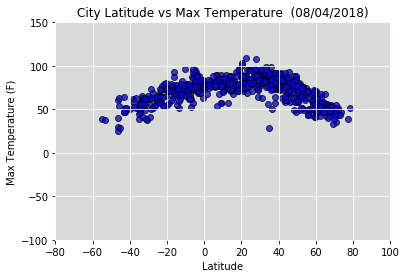

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['MaxTemp(in F)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
plt.title("City Latitude vs Max Temperature  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-80, 100])
ax.set_ylim([-100, 150])
plt.grid(color='w')
plt.show()

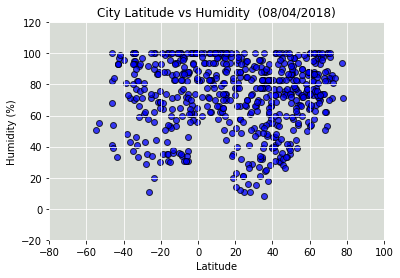

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Humidity(%)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
plt.title("City Latitude vs Humidity  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-80, 100])
ax.set_ylim([-20, 120])
plt.grid(color='w')
plt.show()

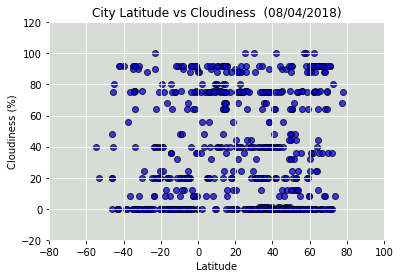

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Cloudiness(%)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
plt.title("City Latitude vs Cloudiness  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-80, 100])
ax.set_ylim([-20, 120])
plt.grid(color='w')
plt.show()

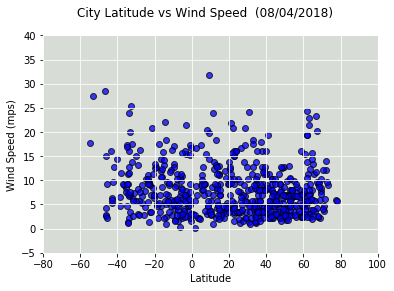

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
ax.scatter(weather_data_df['Lat'], weather_data_df['Wind Speed(mph)'], marker="o", facecolors="b",
            edgecolors="black", 
            alpha=0.75)
date_str = datetime.fromtimestamp(int(weather_data_df.iloc[0]['Date'])).strftime('(%m/%d/%Y)')
fig.suptitle("City Latitude vs Wind Speed  " + date_str)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mps)")
#plt.rcParams['figure.facecolor'] = 'grey'
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('w')
ax.set_xlim([-80, 100])
ax.set_ylim([-5, 40])
plt.grid(color='w')
plt.show()

### "What's the weather like as we approach the equator?"

(0, 5)

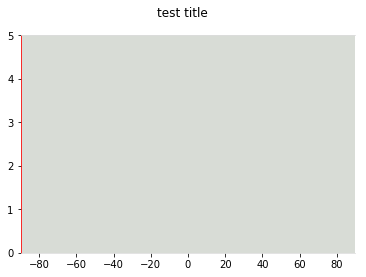

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # nrows, ncols, index
ax.set_facecolor('xkcd:light grey')
fig.suptitle('test title')
ax.spines['bottom'].set_color('#dddddd')
ax.spines['top'].set_color('#dddddd') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('red')
ax.set_xlim([-90, 90])
ax.set_ylim([0, 5])

#ax.set_facecolor((1.0, 0.47, 0.42))